In [34]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Carregando o dataset
titanic = pd.read_csv('Titanic-Dataset.csv')

In [36]:
#EDA - Verificando as primeiras linhas e estrutura
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# EDA - Obter informações sobre o dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# EDA - Resumo estatístico das colunas numéricas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# EDA - Identificar colunas com dados faltantes - percentual
missing_data = titanic.isnull().mean() * 100
formatted_missing_data = missing_data[missing_data > 0].apply(lambda x: f'{x:.2f}%') # formata os valores como porcentagem com 2 casas decimais
print(formatted_missing_data)

Age         19.87%
Cabin       77.10%
Embarked     0.22%
dtype: object


In [40]:
# Imputar dados faltantes
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median()) # substitui valores nulos pela mediana da coluna 'Age'
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0]) # substitui valores nulos pela moda da coluna 'Embarked'

# Verificar se ainda existem valores nulos após a imputação
missing_data_after_imputation = titanic.isnull().mean() * 100
formatted_missing_data_after_imputation = missing_data_after_imputation[missing_data_after_imputation > 0].apply(lambda x: f'{x:.2f}%')
print(formatted_missing_data_after_imputation[missing_data_after_imputation > 0])

Cabin    77.10%
dtype: object


In [41]:
# Filtrar apenas colunas numéricas
numeric_columns = titanic.select_dtypes(include = ['int64', 'float64'])

# Identificar outliers usando Intervalo Interquartil (IQR)
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).sum()
print('Número de outliers por coluna:')
print(outliers)



Número de outliers por coluna:
PassengerId      0
Survived         0
Pclass           0
Age             66
SibSp           46
Parch          213
Fare           116
dtype: int64


In [42]:
# Criar uma nova coluna indicando se o valor de "Cabin" estava ausente
titanic['Cabin_missing'] = titanic['Cabin'] .isnull()

# Substituir NaN por 'unknown' na coluna 'Cabin'
titanic['Cabin'] = titanic['Cabin'].fillna('unknown')

In [43]:
# Verificar se ainda existem valores nulos após imputação
missing_data_after_imputation = titanic.isnull().sum()

# Filtrar apenas colunas com valores nulos
missing_columns = missing_data_after_imputation[missing_data_after_imputation > 0]

# Exibir as colunas que ainda possuem valores
if not missing_columns.empty:
    print('Dados faltantes após imputação:')
    print(missing_columns)
else:
    print('Não há dados faltantes.')

Não há dados faltantes.


In [45]:
# Verificar os tipos de colunas antes de ver o boxplot - este só aceita int64 ou float64
print(titanic.dtypes)

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
Cabin_missing       bool
dtype: object


In [47]:
# Converter a coluna 'Survived' para booleano
titanic['Survived'] = titanic['Survived'].replace({0: False, 1: True})

# Filtrar apenas os sobreviventes
sobreviventes = titanic[titanic['Survived'] == True]

# Exibir os primeiros sobreviventes
print(sobreviventes.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
1              2      True       1   
2              3      True       3   
3              4      True       1   
8              9      True       3   
9             10      True       2   
..           ...       ...     ...   
875          876      True       3   
879          880      True       1   
880          881      True       2   
887          888      True       1   
889          890      True       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                     

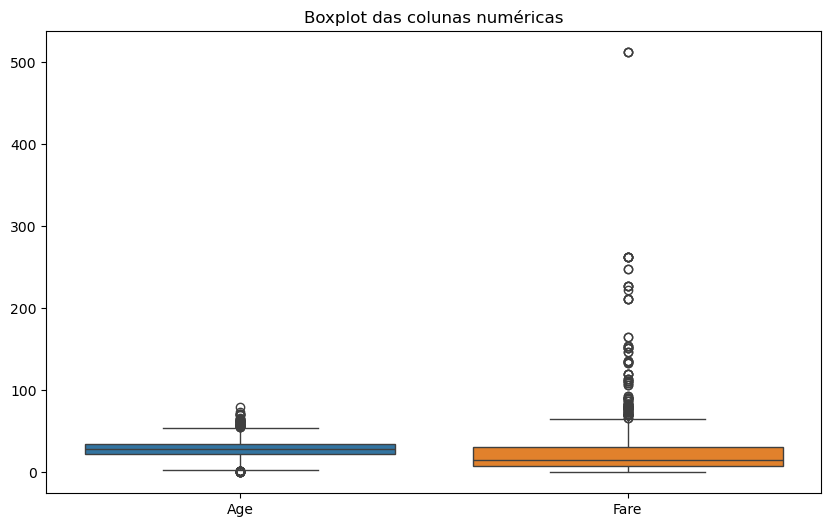

In [49]:
# Boxplot para visualizar a distribuição das colunas numéricas
plt.figure(figsize = (10,6))
sns.boxplot(data = titanic[['Age', 'Fare']])
plt.title('Boxplot das colunas numéricas')
plt.show()

In [52]:
# Verificando a distribuição de Age e Fare
print(titanic[['Age', 'Fare']].describe())

              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200
